In [1]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kunde\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
pip install wordcloud

  Using cached wordcloud-1.9.1.1.tar.gz (222 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py install for wordcloud: started
  Running setup.py install for wordcloud: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  DEPRECATION: wordcloud is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559
  error: subprocess-exited-with-error
  
  Running setup.py install for wordcloud did not run successfully.
  exit code: 1
  
  [22 lines of output]
  running install
  C:\Users\kunde\AppData\Local\Programs\Python\Python311\Lib\site-packages\setuptools\command\install.py:34: SetuptoolsDeprecationWarning: setup.py install is deprecated. Use build and pip and other standards-based tools.
    warnings.warn(
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-311
  creating build\lib.win-amd64-cpython-311\wordcloud
  copying wordcloud\color_from_image.py -> build\lib.win-amd64-cpython-311\wordcloud
  copying 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib import style
style.use('ggplot')
import re
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [4]:
pip install nltk


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
df = pd.read_csv('IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [6]:
df.shape

(50000, 2)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


Text(0.5, 1.0, 'Sentiment distribution')

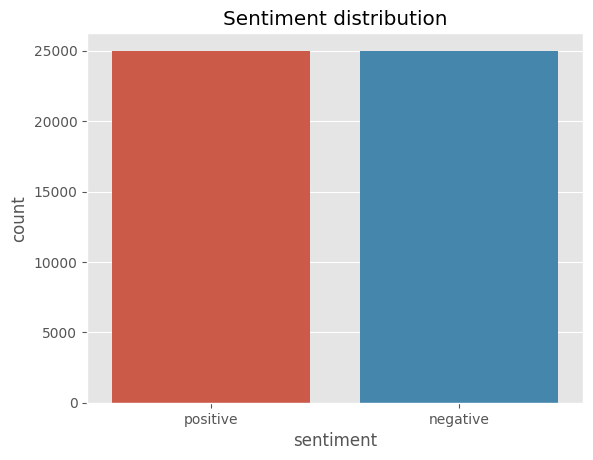

In [8]:
sns.countplot(x='sentiment', data=df)
plt.title("Sentiment distribution")

In [9]:
for i in range(5):
    print("Review: ", [i])
    print(df['review'].iloc[i], "\n")
    print("Sentiment: ", df['sentiment'].iloc[i], "\n\n")

Review:  [0]
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is d

In [10]:
# Here Do Encoding replace positive with 0 and negative with 1
df.sentiment.replace("positive", 0, inplace=True)
df.sentiment.replace("negative", 1, inplace=True)

In [11]:
df.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,0
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",1
49997,I am a Catholic taught in parochial elementary...,1
49998,I'm going to have to disagree with the previou...,1
49999,No one expects the Star Trek movies to be high...,1


In [12]:
#here we are crating a function to pre-processing the data 
def data_processing(text):
    text= text.lower()
    text = re.sub('<br />', '', text)
    text = re.sub(r"https\S+|www\S+|http\S+", '', text, flags = re.MULTILINE)
    text = re.sub(r'\@w+|\#', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [13]:
#Check the download 
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kunde\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
#apply function on review
df.review = df['review'].apply(data_processing)

In [15]:
#find duplicate entry in review 
duplicated_count = df.duplicated().sum()
print("Number of duplicate entries: ", duplicated_count)

Number of duplicate entries:  422


In [16]:
#drop the duplicates 
df = df.drop_duplicates('review')

In [17]:
#create stemming 
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [18]:
# apply function stemming on review 
df.review = df['review'].apply(lambda x: stemming(x))

In [19]:
#see the data 
df.head(5)

,review,sentiment
0,one reviewers mentioned watching 1 oz episode ...,0
1,wonderful little production filming technique ...,0
2,thought wonderful way spend time hot summer we...,0
3,basically theres family little boy jake thinks...,1
4,petter matteis love time money visually stunni...,0


In [20]:
pos_reviews =  df[df.sentiment == 1]
pos_reviews.head()

,review,sentiment
3,basically theres family little boy jake thinks...,1
7,show amazing fresh innovative idea 70s first a...,1
8,encouraged positive comments film looking forw...,1
10,phil alien one quirky films humour based aroun...,1
11,saw movie 12 came recall scariest scene big bi...,1


In [21]:
# Semi-Supervised model 

In [22]:
#split into 
X = df['review']
Y = df['sentiment']

In [23]:
#convert text data into number 
vect = TfidfVectorizer()
X = vect.fit_transform(df['review'])

In [24]:
#split into x_train, x_test, x_unlabel 
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
data_x = x_train 
x_train, x_unl, y_train, y_unl = train_test_split(x_train, y_train , test_size=0.7, random_state=42)

In [25]:
#check shape 
print(x_train.shape, y_train.shape, "This is shape of train data ")
print(x_unl.shape, y_unl.shape, "This is shape of unlabel data ")

(10411, 221707) (10411,) This is shape of train data 
(24293, 221707) (24293,) This is shape of unlabel data 


In [26]:
# import useful labrary 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [27]:
#first create 
model_pre = LogisticRegression()
model_pre.fit(x_train, y_train)
predict = model_pre.predict(x_train)

In [28]:
accuracy_score(y_train, predict)

0.9477475746806263

In [29]:
#classification report 
print(classification_report(y_train, predict))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      5169
           1       0.95      0.94      0.95      5242

    accuracy                           0.95     10411
   macro avg       0.95      0.95      0.95     10411
weighted avg       0.95      0.95      0.95     10411



In [30]:
#confusion_matrix
cm = confusion_matrix(y_train, predict)

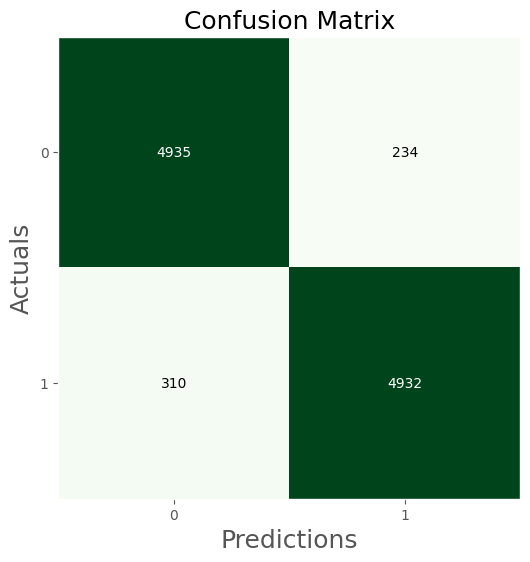

In [31]:
from mlxtend.plotting import plot_confusion_matrix
 
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [32]:
#predict unlabel data 
predict_unl = model_pre.predict(x_unl)

In [33]:
import numpy as np
print(x_unl.shape)
x_train.shape

(24293, 221707)


(10411, 221707)

In [34]:
#this is predicted label 
predict_unl

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [35]:
#check both values 
predict_unl
np.array(y_train)

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [36]:
new_label = np.concatenate((y_train, predict_unl), axis=0)
total_data = data_x

In [38]:
# create new model 
model = MultinomialNB()
model.fit(total_data, new_label)

MultinomialNB()

In [39]:
# test on test data 
x_pred = model.predict(x_test)

In [40]:
#classification report 
print(classification_report(y_test, x_pred))

              precision    recall  f1-score   support

           0       0.50      0.86      0.63      7513
           1       0.46      0.12      0.19      7361

    accuracy                           0.49     14874
   macro avg       0.48      0.49      0.41     14874
weighted avg       0.48      0.49      0.41     14874



In [42]:
#confusion_matrix
cm = confusion_matrix(y_test, x_pred)

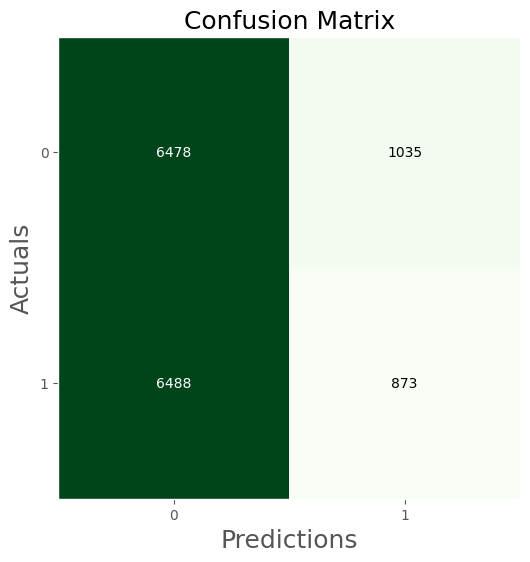

In [43]:
from mlxtend.plotting import plot_confusion_matrix
 
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()